# Estimateur moyenne de température par region

In [7]:
full_data <- read.csv("./../data/donnees-synop-essentielles-omm.csv", 
            sep=";", 
            na.string=c("","null","NaN"),
            header=TRUE, 
            stringsAsFactors=TRUE) # SI IL Y A DES PROBLÈMES BIZARRES PLUS LOIN, METTRE À FALSE

In [9]:
head(full_data)
names(full_data)

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.,mois_de_l_annee
,<int>,<fct>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>
1,7181,2016-07-12T11:00:00+02:00,101410,-30,8,230,2.9,293.35,286.55,65,⋯,336,Thuilley-aux-Groseilles,54523,CC du Pays de Colombey et du Sud Toulois,245400510,Meurthe-et-Moselle,54,Grand Est,44,7
2,81405,2017-01-08T07:00:00+01:00,101140,-140,8,240,0.5,297.25,296.25,94,⋯,4,Matoury,97307,CA du Centre Littoral,249730045,Guyane,973,Guyane,3,1
3,7627,2017-01-08T13:00:00+01:00,103380,-40,8,30,2.1,277.55,269.75,57,⋯,414,Lorp-Sentaraille,09289,CC Couserans-Pyrénées,200067940,Ariège,09,Occitanie,76,1
4,78894,2017-01-09T13:00:00+01:00,101760,0,NA,100,2.3,298.15,291.35,66,⋯,44,NA,NA,NA,NA,NA,NA,NA,NA,1
5,7020,2017-01-12T13:00:00+01:00,100580,-710,8,210,11.9,282.05,280.15,88,⋯,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,1
6,7280,2017-12-23T13:00:00+01:00,103830,-10,0,10,2.7,280.75,278.35,85,⋯,219,Ouges,21473,Dijon Métropole,242100410,Côte-d'Or,21,Bourgogne-Franche-Comté,27,12


[1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                                   
[12] "Temps.présent"                                            
[13] "Temps.passé.1"                                            
[14] "Temps.passé.2"                                            
[15] "Nebulosité.totale"                                        
[16] "Nébulosité..des.nuages.de.l..étage.inférieur"             
[17] "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur"       
[18] "Type.des.nuages.de.l.étage.inférieur"                     
[19] "Type.des.nuages.de.l.étage.moyen"                         
[20] "Type.des.nuages.de.l.étage.supérieur"                     
[21] "Pression.station"                                         
[22] "Niveau.barométrique"                                      
[23] "Géopotentiel"                                             
[24] "Variation.de.pression.en.24.heures"                       
[25] "Température.minimale.sur.12.heures"                       
[26] "Température.minimale.sur.24.heures"                       
[27] "Température.maximale.sur.12.heures"                       
[28] "Température.maximale.sur.24.heures"                       
[29] "Température.minimale.du.sol.sur.12.heures"                
[30] "Méthode.de.mesure.Température.du.thermomètre.mouillé"     
[31] "Température.du.thermomètre.mouillé"                       
[32] "Rafale.sur.les.10.dernières.minutes"                      
[33] "Rafales.sur.une.période"                                  
[34] "Periode.de.mesure.de.la.rafale"                           
[35] "Etat.du.sol"                                              
[36] "Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol"
[37] "Hauteur.de.la.neige.fraîche"                              
[38] "Periode.de.mesure.de.la.neige.fraiche"                    
[39] "Précipitations.dans.la.dernière.heure"                    
[40] "Précipitations.dans.les.3.dernières.heures"               
[41] "Précipitations.dans.les.6.dernières.heures"               
[42] "Précipitations.dans.les.12.dernières.heures"              
[43] "Précipitations.dans.les.24.dernières.heures"              
[44] "Phénomène.spécial.1"                                      
[45] "Phénomène.spécial.2"                                      
[46] "Phénomène.spécial.3"                                      
[47] "Phénomène.spécial.4"                                      
[48] "Nébulosité.couche.nuageuse.1"                             
[49] "Type.nuage.1"                                             
[50] "Hauteur.de.base.1"                                        
[51] "Nébulosité.couche.nuageuse.2"                             
[52] "Type.nuage.2"                                             
[53] "Hauteur.de.base.2"                                        
[54] "Nébulosité.couche.nuageuse.3"                             
[55] "Type.nuage.3"                                             
[56] "Hauteur.de.base.3"                                        
[57] "Nébulosité.couche.nuageuse.4"                             
[58] "Type.nuage.4"                                             
[59] "Hauteur.de.base.4"                                        
[60] "Coordonnees"                                              
[61] "Nom"                                                      
[62] "Type.de.tendance.barométrique.

In [14]:
stats_temperature_region <- aggregate(Température...C. ~ region..name., 
                          data = full_data, 
                          FUN = function(x) c(mean = mean(x, na.rm=TRUE),
                                              sd = sd(x, na.rm=TRUE),
                                              n = length(na.omit(x))))

# Nettoyage du tableau (car aggregate met tout en colonnes imbriquées)
stats_region <- do.call(data.frame, stats_region)

print(stats_region)

                                 region..name. Température...C..mean
1                         Auvergne-Rhône-Alpes             12.843774
2                      Bourgogne-Franche-Comté             12.254824
3                                     Bretagne             12.772030
4                          Centre-Val de Loire             12.964214
5                                        Corse             16.817424
6                                    Grand Est             11.902154
7                                   Guadeloupe             26.896396
8                                       Guyane             26.486657
9                              Hauts-de-France             11.818923
10                               Île-de-France             12.897563
11                                  La Réunion             24.596620
12                                  Martinique             27.321202
13                                     Mayotte             27.402678
14                                

# Diagramme moustache des distributions de températures par région

Warning message:
“Removed 22176 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


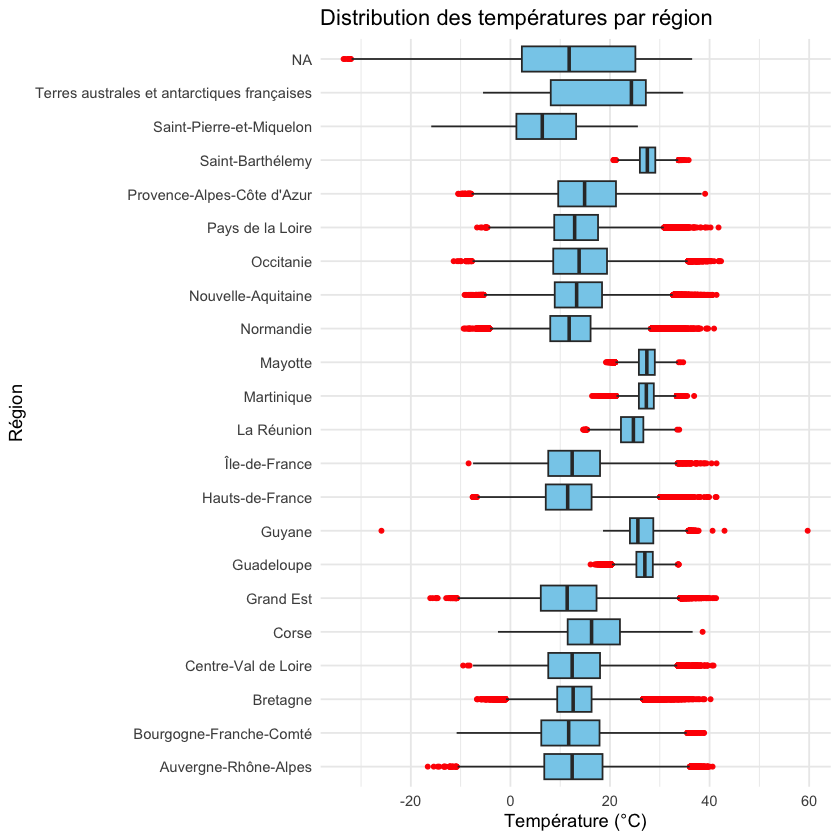

In [16]:
ggplot(full_data, aes(x = region..name., y = Température...C.)) +
  geom_boxplot(fill = "skyblue", outlier.color = "red", outlier.size = 1) +
  coord_flip() +  # pour mettre les régions en ordonnée (plus lisible)
  labs(title = "Distribution des températures par région",
       x = "Région",
       y = "Température (°C)") +
  theme_minimal()

# calculs des temprératures moyennes mensuelles

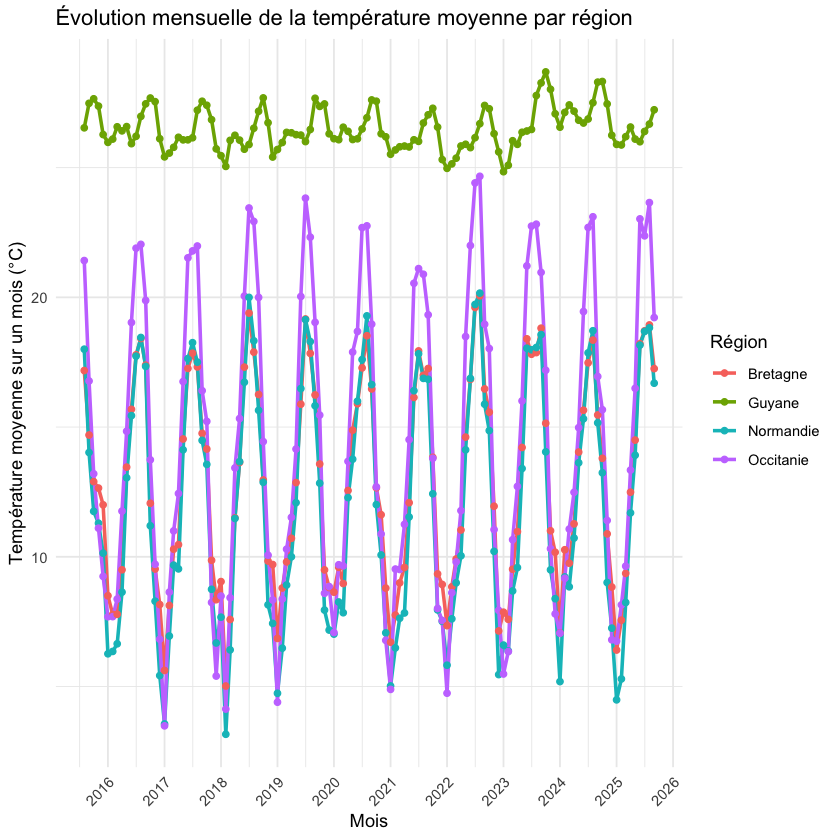

In [39]:
# Extraire juste la date (MM-DD)
full_data <- full_data %>%
  mutate(Date_only = as.Date(substr(Date, 1, 10)),
         month_only = as.Date(paste0(format(Date_only, "%Y-%m"), "-01")))  # "2024-03")

temp_mensuelle <- full_data %>%
  group_by(month_only, region..name.) %>%
  summarise(mean_temp = mean(Température...C., na.rm = TRUE), .groups = "drop")

# Liste des régions regardées
regions_a_plot <- c("Bretagne", "Normandie", "Occitanie","Guyane")
temp_mensuelle <- temp_mensuelle %>%
  filter(region..name. %in% regions_a_plot)

ggplot(temp_mensuelle, aes(x = month_only, y = mean_temp, color = region..name., group = region..name.)) +
  geom_line(size = 1) +
  geom_point() +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  labs(title = "Évolution mensuelle de la température moyenne par région",
       x = "Mois",
       y = "Température moyenne sur un mois (°C)",
       color = "Région") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # rotation des labels x


region..name.,moyenne,ecart_type,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Bretagne,12.79253,3.984599,5.020000,20.05868
Guyane,26.48927,0.784544,24.842288,28.68855
Normandie,11.99591,4.668678,3.159820,20.16190
Occitanie,14.21717,5.931184,3.484878,24.66508


ERROR while rich displaying an object: Error in as.data.frame.default(x[[i]], optional = TRUE, stringsAsFactors = stringsAsFactors): impossible de convertir automatiquement la classe ‘"lm"’ en un tableau de données (data.frame)

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2

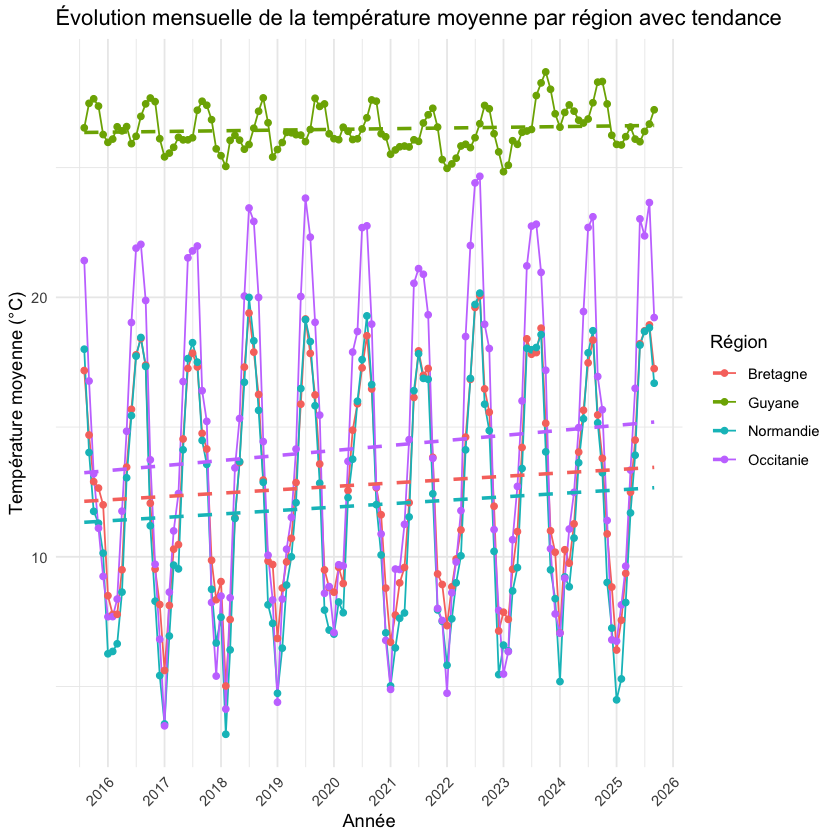

In [46]:
stats_region <- temp_mensuelle %>%
  group_by(region..name.) %>%
  summarise(
    moyenne = mean(mean_temp, na.rm = TRUE),
    ecart_type = sd(mean_temp, na.rm = TRUE),
    min = min(mean_temp, na.rm = TRUE),
    max = max(mean_temp, na.rm = TRUE),
    .groups = "drop"
  )

stats_region

# Ajustement linéaire par région
trend_region <- temp_mensuelle %>%
  group_by(region..name.) %>%
  summarise(
    model = list(lm(mean_temp ~ as.numeric(month_only))),
    .groups = "drop"
  ) %>%
  mutate(slope = sapply(model, function(m) coef(m)[2]))

trend_region



Trend, tout sur le meme plot

`geom_smooth()` using formula = 'y ~ x'


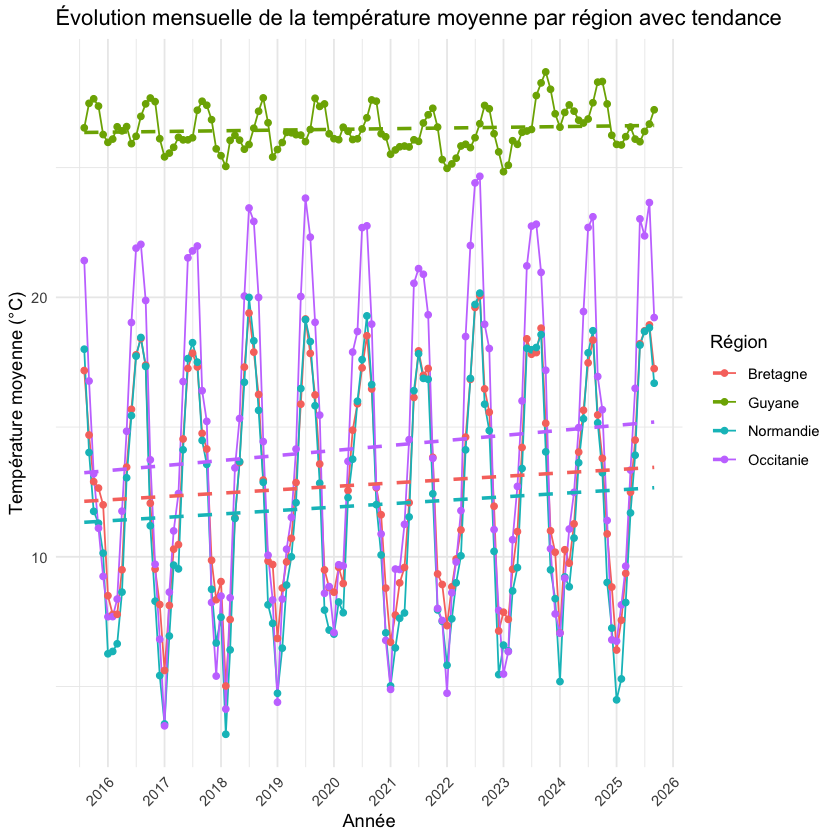

In [47]:
ggplot(temp_mensuelle, aes(x = month_only, y = mean_temp, color = region..name., group = region..name.)) +
  geom_line() +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  labs(title = "Évolution mensuelle de la température moyenne par région avec tendance",
       x = "Année",
       y = "Température moyenne (°C)",
       color = "Région") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

trend, un plot une region

`geom_smooth()` using formula = 'y ~ x'


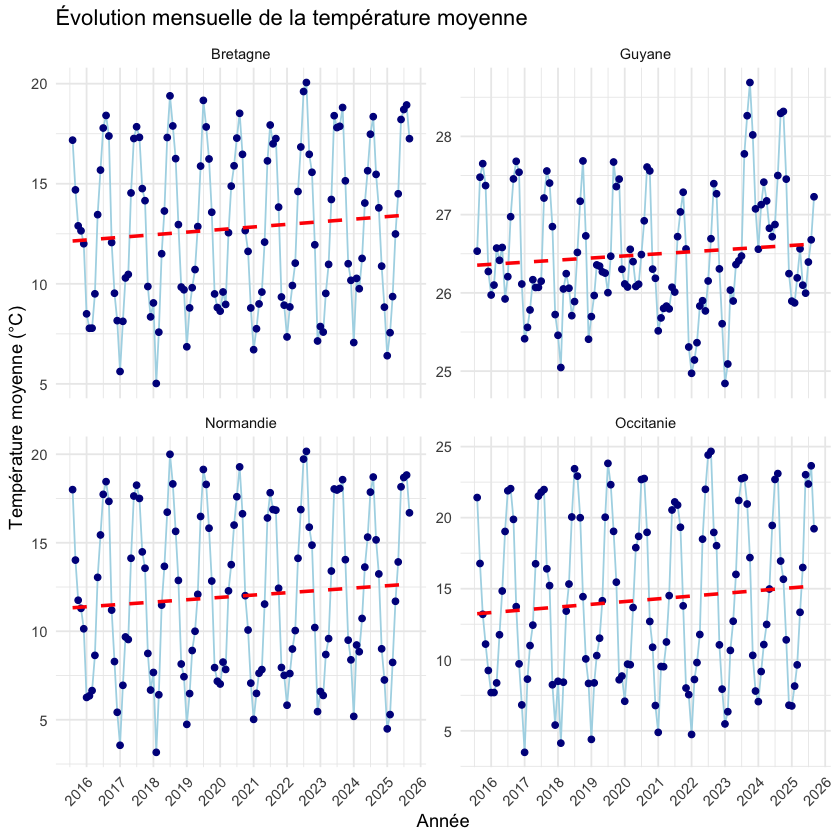

In [50]:
ggplot(temp_mensuelle, aes(x = month_only, y = mean_temp, group = region..name.)) +
  geom_line(color = "lightblue") +
  geom_point(color = "darkblue") +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed", color = "red") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  labs(title = "Évolution mensuelle de la température moyenne",
       x = "Année",
       y = "Température moyenne (°C)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  facet_wrap(~ region..name., scales = "free_y")  # un plot par région

In [56]:
# Repartons sans filtrer
temp_mensuelle_all <- full_data %>%
  mutate(Date_only = as.Date(substr(Date, 1, 10)),
         month_only = as.Date(paste0(format(Date_only, "%Y-%m"), "-01"))) %>%
  group_by(month_only, region..name.) %>%
  summarise(mean_temp = mean(Température...C., na.rm = TRUE), .groups = "drop")

# Ajustement linéaire par région
trend_region <- temp_mensuelle_all %>%
  group_by(region..name.) %>%
  summarise(
    model = list(lm(mean_temp ~ as.numeric(month_only))),
    .groups = "drop"
  ) %>%
  mutate(slope = sapply(model, function(m) coef(m)[2]))

trend_region


ERROR while rich displaying an object: Error in as.data.frame.default(x[[i]], optional = TRUE, stringsAsFactors = stringsAsFactors): impossible de convertir automatiquement la classe ‘"lm"’ en un tableau de données (data.frame)

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2

In [60]:
names(temp_mensuelle_all)

[1] "month_only"    "region..name." "mean_temp"

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`).”


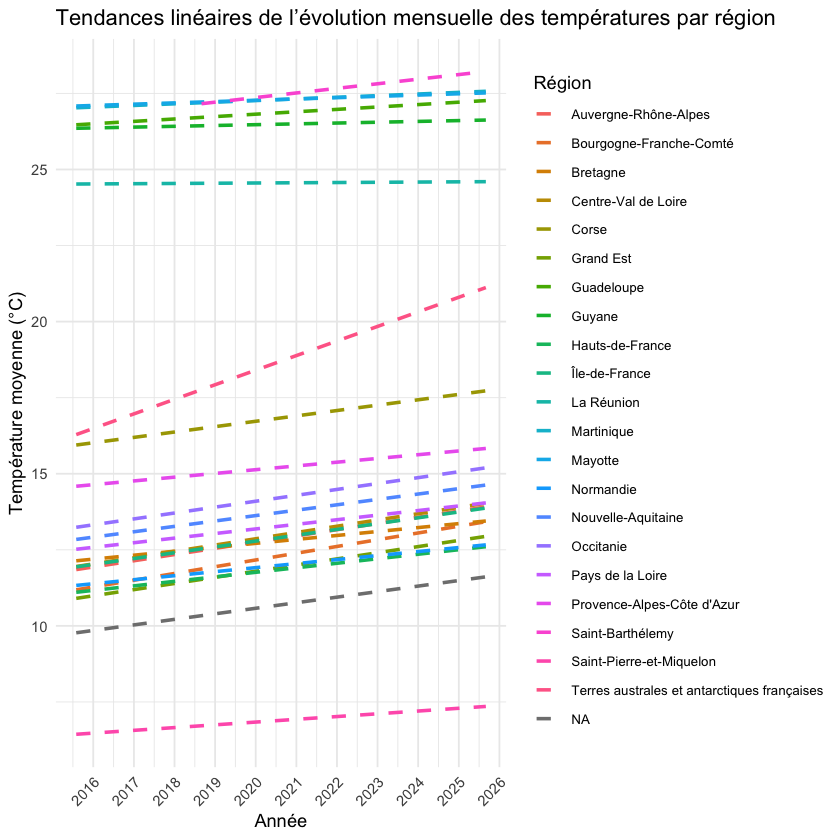

In [61]:
ggplot(temp_mensuelle_all, aes(x = month_only, y = mean_temp, color = region..name.)) +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed", size = 1) +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  labs(title = "Tendances linéaires de l’évolution mensuelle des températures par région",
       x = "Année",
       y = "Température moyenne (°C)",
       color = "Région") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "right",          # ou "left"
        legend.text = element_text(size = 8)) +
  guides(color = guide_legend(ncol = 1))
